In [1]:
from IPython.display import Image
%matplotlib inline

# experimental script
import pickle
import numpy as np
from pandas import DataFrame
import forest_surveyor.datasets as ds
from forest_surveyor.routines import grid_experiment

In [12]:
datasets = [
#             ds.accident_small_samp_data,
            ds.adult_small_samp_data,
            ds.bankmark_samp_data,
            ds.car_data,
            ds.cardiotography_data,
            ds.credit_data,
            ds.german_data,
            ds.lending_tiny_samp_data,
            ds.nursery_samp_data,
            ds.rcdv_samp_data
           ]

random_state = np.repeat([123, 124, 125, 126, 127], 3)
alpha_paths = np.tile([0.5] , 15)
support_paths = np.tile([0.02], 15) 
over_f = np.repeat([False], 2)
over_t = np.concatenate((np.array([True]), over_f))
override_tuning = np.tile(over_t, 5)
precis_threshold = np.tile([0.9, 0.95, 0.99], 5) # this will be updated
exp_grid1 = DataFrame([(r, a, s, p, o) for r, a, s, p, o in zip(random_state,
                                                                alpha_paths,
                                                                support_paths,
                                                                precis_threshold,
                                                                override_tuning)], # remove this
                     columns=['random_state', 'alpha_paths', 'support_paths', 'precis_threshold', 'override_tuning'])


,random_state,alpha_paths,support_paths,precis_threshold,override_tuning
0,123,0.5,0.02,0.90,True
1,123,0.5,0.02,0.95,False
2,123,0.5,0.02,0.99,False
3,124,0.5,0.02,0.90,True
4,124,0.5,0.02,0.95,False
5,124,0.5,0.02,0.99,False
6,125,0.5,0.02,0.90,True
7,125,0.5,0.02,0.95,False
8,125,0.5,0.02,0.99,False
9,126,0.5,0.02,0.90,True


random_state         123
alpha_paths          0.5
support_paths       0.02
precis_threshold     0.9
override_tuning     True
Name: 0, dtype: object
LOADING NEW DATA SET.

Finding best parameters for Random Forest. Checking for prior tuning parameters.

12 runs to do

starting new run at: Tue May 15 11:39:09 2018
{'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 500}
ending run at: Tue May 15 11:39:10 2018
completed 1 run(s)

starting new run at: Tue May 15 11:39:10 2018
{'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 1000}
ending run at: Tue May 15 11:39:11 2018
completed 2 run(s)

starting new run at: Tue May 15 11:39:11 2018
{'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 1500}
ending run at: Tue May 15 11:39:13 2018
completed 3 run(s)

starting new run at: Tue May 15 11:39:13 2018
{'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 500}
ending run at: Tue May 15 11:39:14 2018
completed 4 run(s)

starting new run at: Tue May 15 11:39:14 2018
{'max_depth': 8,

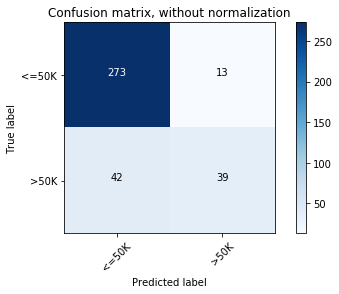

Normalized confusion matrix
[[0.95 0.05]
 [0.52 0.48]]


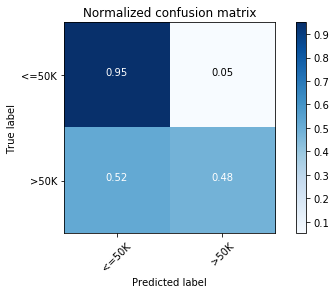

NOTE: During run, true divide errors are acceptable.
    Returned when a tree does not contain any node for either/both upper and lower bounds of a feature.

    
Starting new run at: Tue May 15 11:39:29 2018 with batch_size = 7 and n_batches = 50...(please wait)


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:276: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(lowers, lower_bins)[0]).round(5)
C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:272: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(uppers, upper_bins)[0]).round(5)


done batch 0
done batch 1
done batch 2
done batch 3
done batch 4
done batch 5
done batch 6
done batch 7
done batch 8
done batch 9
done batch 10
done batch 11
done batch 12
done batch 13
done batch 14
done batch 15
done batch 16
done batch 17
done batch 18
done batch 19
done batch 20
done batch 21
done batch 22
done batch 23
done batch 24
done batch 25
done batch 26
done batch 27
done batch 28
done batch 29
done batch 30
done batch 31
done batch 32
done batch 33
done batch 34
done batch 35
done batch 36
done batch 37
done batch 38
done batch 39
done batch 40
done batch 41
done batch 42
done batch 43
done batch 44
done batch 45
done batch 46
done batch 47
done batch 48
done batch 49
Done. Completed run at: Tue May 15 11:51:15 2018. Elapsed time (seconds) = 706.0994971344189

Compiling Training Results at: Tue May 15 11:51:15 2018...(please wait)
Results Completed at: Tue May 15 11:51:16 2018. Elapsed time (seconds) = 1.067237838957226
Whiteboxing Randfor Done

Processing Anchors
Starting

C:\Users\id126493\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)



Done

Created helper function enc_model(). A pipeline: feature encoding -> rf model

Accuracy on unseen instances: 0.8311
Cohen's Kappa on unseen instances: 0.4559

Precision: [0.86, 0.66]
Recall: [0.93, 0.48]
F1 Score: [0.9, 0.56]
Support: [286, 81]

Confusion matrix, without normalization
[[266  20]
 [ 42  39]]


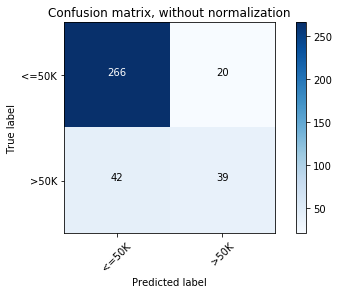

Normalized confusion matrix
[[0.93 0.07]
 [0.52 0.48]]


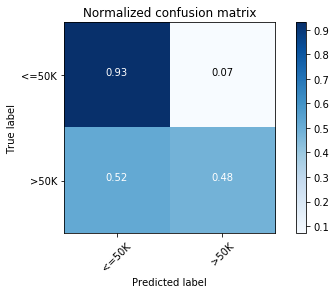

Working on Anchors for instance 356


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\routines.py:656: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)
C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\routines.py:708: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)


Working on Anchors for instance 674
Working on Anchors for instance 260
Working on Anchors for instance 960
Working on Anchors for instance 204
Working on Anchors for instance 681
Working on Anchors for instance 449
Working on Anchors for instance 620
Working on Anchors for instance 1051
Working on Anchors for instance 512
Working on Anchors for instance 927
Working on Anchors for instance 614
Working on Anchors for instance 18
Working on Anchors for instance 528
Working on Anchors for instance 167
Working on Anchors for instance 103
Working on Anchors for instance 821
Working on Anchors for instance 698
Working on Anchors for instance 186
Working on Anchors for instance 453
Working on Anchors for instance 289
Working on Anchors for instance 1187
Working on Anchors for instance 597
Working on Anchors for instance 182
Working on Anchors for instance 119
Working on Anchors for instance 882
Working on Anchors for instance 1066
Working on Anchors for instance 517
Working on Anchors for ins

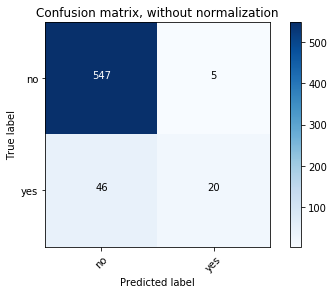

Normalized confusion matrix
[[0.99 0.01]
 [0.7  0.3 ]]


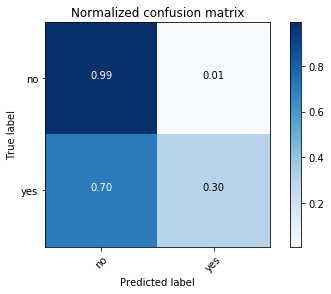

NOTE: During run, true divide errors are acceptable.
    Returned when a tree does not contain any node for either/both upper and lower bounds of a feature.

    
Starting new run at: Tue May 15 11:57:53 2018 with batch_size = 10 and n_batches = 50...(please wait)


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:272: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(uppers, upper_bins)[0]).round(5)
C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:276: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(lowers, lower_bins)[0]).round(5)


done batch 0
done batch 1
done batch 2
done batch 3
done batch 4
done batch 5
done batch 6
done batch 7
done batch 8
done batch 9
done batch 10
done batch 11
done batch 12
done batch 13
done batch 14
done batch 15
done batch 16
done batch 17
done batch 18
done batch 19
done batch 20
done batch 21
done batch 22
done batch 23
done batch 24
done batch 25
done batch 26
done batch 27
done batch 28
done batch 29
done batch 30
done batch 31
done batch 32
done batch 33
done batch 34
done batch 35
done batch 36
done batch 37
done batch 38
done batch 39
done batch 40
done batch 41
done batch 42
done batch 43
done batch 44
done batch 45
done batch 46
done batch 47
done batch 48
done batch 49
Done. Completed run at: Tue May 15 12:22:46 2018. Elapsed time (seconds) = 1493.0601019913302

Compiling Training Results at: Tue May 15 12:22:46 2018...(please wait)


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:789: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)


Results Completed at: Tue May 15 12:22:48 2018. Elapsed time (seconds) = 1.397779110528063
Whiteboxing Randfor Done

Processing Anchors
Starting new run at: Tue May 15 12:22:48 2018

Best OOB Accuracy Estimate during tuning: 0.9126
Best parameters: {'max_depth': 16, 'min_samples_leaf': 5, 'n_estimators': 1500}

Training a random forest model using best parameters... (please wait)

Done

Created helper function enc_model(). A pipeline: feature encoding -> rf model

Accuracy on unseen instances: 0.9078
Cohen's Kappa on unseen instances: 0.2673

Precision: [0.91, 0.8]
Recall: [0.99, 0.18]
F1 Score: [0.95, 0.3]
Support: [552, 66]

Confusion matrix, without normalization
[[549   3]
 [ 54  12]]


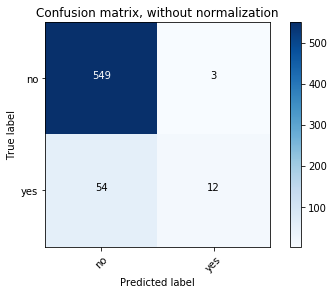

Normalized confusion matrix
[[0.99 0.01]
 [0.82 0.18]]


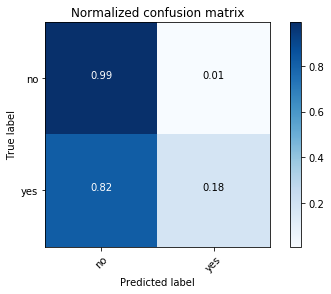

Working on Anchors for instance 1921


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\routines.py:708: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)


Working on Anchors for instance 558
Working on Anchors for instance 1721
Working on Anchors for instance 2012
Working on Anchors for instance 1790
Working on Anchors for instance 1871
Working on Anchors for instance 1035
Working on Anchors for instance 805
Working on Anchors for instance 1476
Working on Anchors for instance 2019
Working on Anchors for instance 91
Working on Anchors for instance 1251
Working on Anchors for instance 1196
Working on Anchors for instance 1684
Working on Anchors for instance 1216
Working on Anchors for instance 356
Working on Anchors for instance 1796
Working on Anchors for instance 1064
Working on Anchors for instance 235
Working on Anchors for instance 63
Working on Anchors for instance 1895
Working on Anchors for instance 982
Working on Anchors for instance 278
Working on Anchors for instance 1851
Working on Anchors for instance 1266
Working on Anchors for instance 1454
Working on Anchors for instance 702
Working on Anchors for instance 814
Working on An

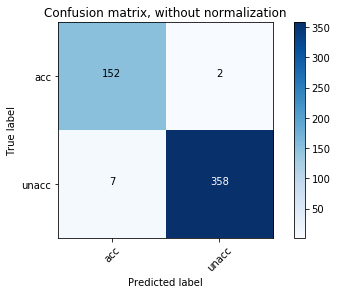

Normalized confusion matrix
[[0.99 0.01]
 [0.02 0.98]]


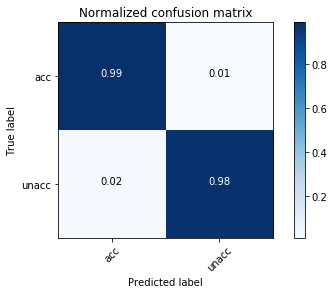

NOTE: During run, true divide errors are acceptable.
    Returned when a tree does not contain any node for either/both upper and lower bounds of a feature.

    
Starting new run at: Tue May 15 12:32:55 2018 with batch_size = 10 and n_batches = 50...(please wait)
done batch 0
done batch 1
done batch 2
done batch 3
done batch 4
done batch 5
done batch 6
done batch 7
done batch 8
done batch 9
done batch 10
done batch 11
done batch 12
done batch 13
done batch 14
done batch 15
done batch 16
done batch 17
done batch 18
done batch 19
done batch 20
done batch 21
done batch 22
done batch 23
done batch 24
done batch 25
done batch 26
done batch 27
done batch 28
done batch 29
done batch 30
done batch 31
done batch 32
done batch 33
done batch 34
done batch 35
done batch 36
done batch 37
done batch 38
done batch 39
done batch 40
done batch 41
done batch 42
done batch 43
done batch 44
done batch 45
done batch 46
done batch 47
done batch 48
done batch 49
Done. Completed run at: Tue May 15 13:06:01 2

C:\Users\id126493\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)



Done

Created helper function enc_model(). A pipeline: feature encoding -> rf model

Accuracy on unseen instances: 0.9827
Cohen's Kappa on unseen instances: 0.9588

Precision: [0.96, 0.99]
Recall: [0.99, 0.98]
F1 Score: [0.97, 0.99]
Support: [154, 365]

Confusion matrix, without normalization
[[152   2]
 [  7 358]]


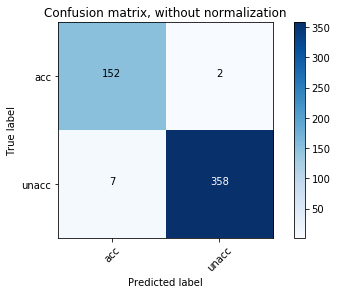

Normalized confusion matrix
[[0.99 0.01]
 [0.02 0.98]]


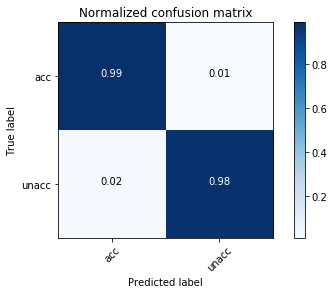

Working on Anchors for instance 1481
Working on Anchors for instance 1390
Working on Anchors for instance 1121
Working on Anchors for instance 120


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\routines.py:656: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)
C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\routines.py:708: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)


Working on Anchors for instance 1677
Working on Anchors for instance 1009
Working on Anchors for instance 1212
Working on Anchors for instance 637
Working on Anchors for instance 1487
Working on Anchors for instance 981
Working on Anchors for instance 1179
Working on Anchors for instance 31
Working on Anchors for instance 985
Working on Anchors for instance 206
Working on Anchors for instance 129
Working on Anchors for instance 1377
Working on Anchors for instance 499
Working on Anchors for instance 905
Working on Anchors for instance 1659
Working on Anchors for instance 63
Working on Anchors for instance 689
Working on Anchors for instance 927
Working on Anchors for instance 1120
Working on Anchors for instance 866
Working on Anchors for instance 134
Working on Anchors for instance 650
Working on Anchors for instance 249
Working on Anchors for instance 1372
Working on Anchors for instance 1000
Working on Anchors for instance 328
Working on Anchors for instance 1337
Working on Anchors 

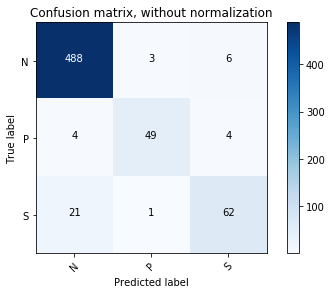

Normalized confusion matrix
[[0.98 0.01 0.01]
 [0.07 0.86 0.07]
 [0.25 0.01 0.74]]


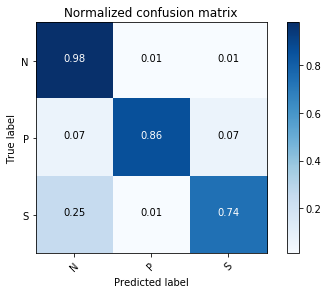

NOTE: During run, true divide errors are acceptable.
    Returned when a tree does not contain any node for either/both upper and lower bounds of a feature.

    
Starting new run at: Tue May 15 13:17:49 2018 with batch_size = 10 and n_batches = 50...(please wait)


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:276: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(lowers, lower_bins)[0]).round(5)
C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:272: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(uppers, upper_bins)[0]).round(5)


done batch 0
done batch 1
done batch 2
done batch 3
done batch 4
done batch 5
done batch 6
done batch 7
done batch 8
done batch 9
done batch 10
done batch 11
done batch 12
done batch 13
done batch 14
done batch 15
done batch 16
done batch 17
done batch 18
done batch 19
done batch 20
done batch 21
done batch 22
done batch 23
done batch 24
done batch 25
done batch 26
done batch 27
done batch 28
done batch 29
done batch 30
done batch 31
done batch 32
done batch 33
done batch 34
done batch 35
done batch 36
done batch 37
done batch 38
done batch 39
done batch 40
done batch 41
done batch 42
done batch 43
done batch 44
done batch 45
done batch 46
done batch 47
done batch 48
done batch 49
Done. Completed run at: Tue May 15 13:44:40 2018. Elapsed time (seconds) = 1610.1171752511873

Compiling Training Results at: Tue May 15 13:44:40 2018...(please wait)


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:789: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)


Results Completed at: Tue May 15 13:44:41 2018. Elapsed time (seconds) = 1.2087781532318331
Whiteboxing Randfor Done

Processing Anchors
Starting new run at: Tue May 15 13:44:41 2018

Best OOB Accuracy Estimate during tuning: 0.9462
Best parameters: {'max_depth': 16, 'min_samples_leaf': 1, 'n_estimators': 1500}

Training a random forest model using best parameters... (please wait)

Done

Created helper function enc_model(). A pipeline: feature encoding -> rf model

Accuracy on unseen instances: 0.9185
Cohen's Kappa on unseen instances: 0.7633

Precision: [0.94, 0.91, 0.77]
Recall: [0.98, 0.86, 0.58]
F1 Score: [0.96, 0.88, 0.66]
Support: [497, 57, 84]

Confusion matrix, without normalization
[[488   0   9]
 [  2  49   6]
 [ 30   5  49]]


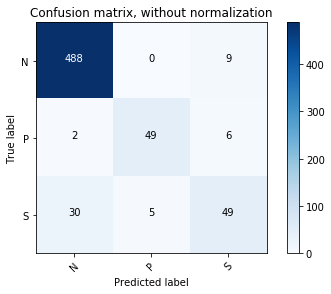

Normalized confusion matrix
[[0.98 0.   0.02]
 [0.04 0.86 0.11]
 [0.36 0.06 0.58]]


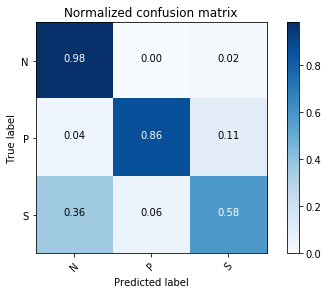

Working on Anchors for instance 961
Working on Anchors for instance 1696


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\routines.py:708: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)
C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\routines.py:656: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)


Working on Anchors for instance 1614
Working on Anchors for instance 1477
Working on Anchors for instance 861
Working on Anchors for instance 449
Working on Anchors for instance 43
Working on Anchors for instance 1174
Working on Anchors for instance 1060
Working on Anchors for instance 1052
Working on Anchors for instance 1335
Working on Anchors for instance 988
Working on Anchors for instance 963
Working on Anchors for instance 1733
Working on Anchors for instance 1976
Working on Anchors for instance 1622
Working on Anchors for instance 1414
Working on Anchors for instance 605
Working on Anchors for instance 585
Working on Anchors for instance 1682
Working on Anchors for instance 1041
Working on Anchors for instance 1624
Working on Anchors for instance 985
Working on Anchors for instance 28
Working on Anchors for instance 318
Working on Anchors for instance 803
Working on Anchors for instance 1311
Working on Anchors for instance 1251
Working on Anchors for instance 458
Working on Anch

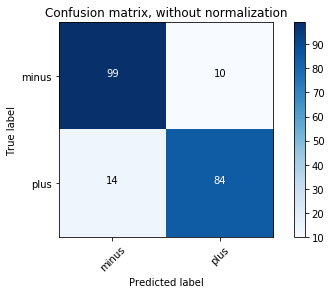

Normalized confusion matrix
[[0.91 0.09]
 [0.14 0.86]]


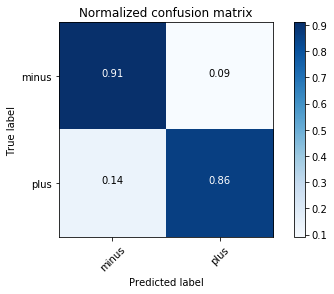

NOTE: During run, true divide errors are acceptable.
    Returned when a tree does not contain any node for either/both upper and lower bounds of a feature.

    
Starting new run at: Tue May 15 14:53:04 2018 with batch_size = 4 and n_batches = 50...(please wait)


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:276: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(lowers, lower_bins)[0]).round(5)
C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:272: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(uppers, upper_bins)[0]).round(5)


done batch 0
done batch 1
done batch 2
done batch 3
done batch 4
done batch 5
done batch 6
done batch 7
done batch 8
done batch 9
done batch 10
done batch 11
done batch 12
done batch 13
done batch 14
done batch 15
done batch 16
done batch 17
done batch 18
done batch 19
done batch 20
done batch 21
done batch 22
done batch 23
done batch 24
done batch 25
done batch 26
done batch 27
done batch 28
done batch 29
done batch 30
done batch 31
done batch 32
done batch 33
done batch 34
done batch 35
done batch 36
done batch 37
done batch 38
done batch 39
done batch 40
done batch 41
done batch 42
done batch 43
done batch 44
done batch 45
done batch 46
done batch 47
done batch 48
done batch 49
Done. Completed run at: Tue May 15 14:56:40 2018. Elapsed time (seconds) = 215.2516494267329

Compiling Training Results at: Tue May 15 14:56:40 2018...(please wait)
Results Completed at: Tue May 15 14:56:40 2018. Elapsed time (seconds) = 0.5958978115668288
Whiteboxing Randfor Done

Processing Anchors
Startin

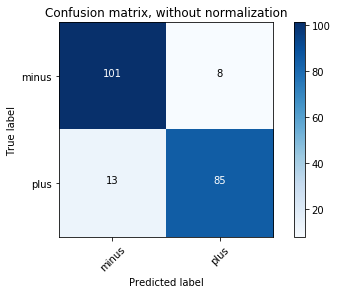

Normalized confusion matrix
[[0.93 0.07]
 [0.13 0.87]]


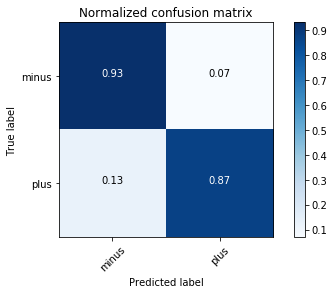

Working on Anchors for instance 399
Working on Anchors for instance 689
Working on Anchors for instance 182
Working on Anchors for instance 283


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\routines.py:708: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)


Working on Anchors for instance 563
Working on Anchors for instance 601
Working on Anchors for instance 679
Working on Anchors for instance 292
Working on Anchors for instance 610
Working on Anchors for instance 368
Working on Anchors for instance 85
Working on Anchors for instance 641
Working on Anchors for instance 664
Working on Anchors for instance 336
Working on Anchors for instance 237
Working on Anchors for instance 185
Working on Anchors for instance 147
Working on Anchors for instance 101
Working on Anchors for instance 145
Working on Anchors for instance 568
Anchors Done. Completed run at: Tue May 15 14:59:59 2018. Elapsed time (seconds) = 199.10855989226548

Results saved at whiteboxing\credit_pickles\results.pickle

To retrieve results execute the following:
results_store = open('whiteboxing\credit_pickles\results.pickle', "rb")
results = pickle.load(results_store)
results_store.close()

LOADING NEW DATA SET.

Finding best parameters for Random Forest. Checking for prior tu

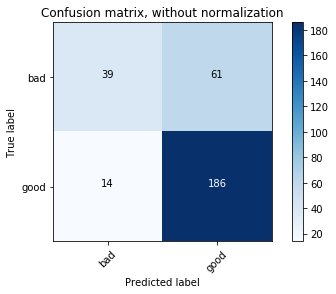

Normalized confusion matrix
[[0.39 0.61]
 [0.07 0.93]]


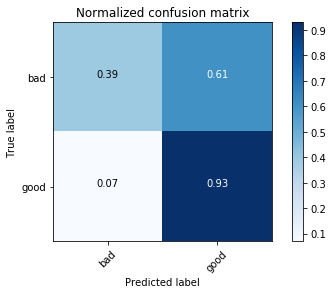

NOTE: During run, true divide errors are acceptable.
    Returned when a tree does not contain any node for either/both upper and lower bounds of a feature.

    
Starting new run at: Tue May 15 15:00:23 2018 with batch_size = 6 and n_batches = 50...(please wait)


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:272: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(uppers, upper_bins)[0]).round(5)
C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:276: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(lowers, lower_bins)[0]).round(5)


done batch 0
done batch 1
done batch 2
done batch 3
done batch 4
done batch 5
done batch 6
done batch 7
done batch 8
done batch 9
done batch 10
done batch 11
done batch 12
done batch 13
done batch 14
done batch 15
done batch 16
done batch 17
done batch 18
done batch 19
done batch 20
done batch 21
done batch 22
done batch 23
done batch 24
done batch 25
done batch 26
done batch 27
done batch 28
done batch 29
done batch 30
done batch 31
done batch 32
done batch 33
done batch 34
done batch 35
done batch 36
done batch 37
done batch 38
done batch 39
done batch 40
done batch 41
done batch 42
done batch 43
done batch 44
done batch 45
done batch 46
done batch 47
done batch 48
done batch 49
Done. Completed run at: Tue May 15 15:22:03 2018. Elapsed time (seconds) = 1299.8553831796016

Compiling Training Results at: Tue May 15 15:22:03 2018...(please wait)


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:789: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)


Results Completed at: Tue May 15 15:22:05 2018. Elapsed time (seconds) = 1.4411560740118148
Whiteboxing Randfor Done

Processing Anchors
Starting new run at: Tue May 15 15:22:05 2018

Best OOB Accuracy Estimate during tuning: 0.7571
Best parameters: {'max_depth': 16, 'min_samples_leaf': 1, 'n_estimators': 1000}

Training a random forest model using best parameters... (please wait)


C:\Users\id126493\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)



Done

Created helper function enc_model(). A pipeline: feature encoding -> rf model

Accuracy on unseen instances: 0.7533
Cohen's Kappa on unseen instances: 0.3729

Precision: [0.74, 0.76]
Recall: [0.4, 0.93]
F1 Score: [0.52, 0.83]
Support: [100, 200]

Confusion matrix, without normalization
[[ 40  60]
 [ 14 186]]


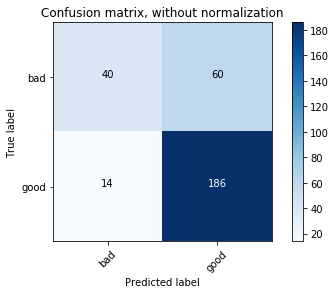

Normalized confusion matrix
[[0.4  0.6 ]
 [0.07 0.93]]


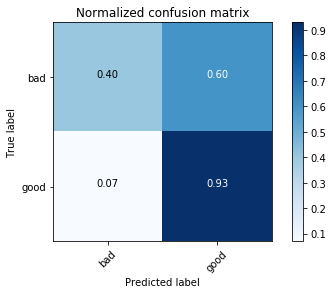

Working on Anchors for instance 131


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\routines.py:656: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)
C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\routines.py:708: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)


Working on Anchors for instance 195
Working on Anchors for instance 372
Working on Anchors for instance 722
Working on Anchors for instance 771
Working on Anchors for instance 161
Working on Anchors for instance 803
Working on Anchors for instance 345
Working on Anchors for instance 437
Working on Anchors for instance 640
Working on Anchors for instance 875
Working on Anchors for instance 828
Working on Anchors for instance 891
Working on Anchors for instance 953
Working on Anchors for instance 298
Working on Anchors for instance 923
Working on Anchors for instance 204
Working on Anchors for instance 807
Working on Anchors for instance 456
Working on Anchors for instance 388
Working on Anchors for instance 512
Working on Anchors for instance 75
Working on Anchors for instance 881
Working on Anchors for instance 13
Working on Anchors for instance 920
Working on Anchors for instance 894
Working on Anchors for instance 273
Working on Anchors for instance 107
Working on Anchors for instanc

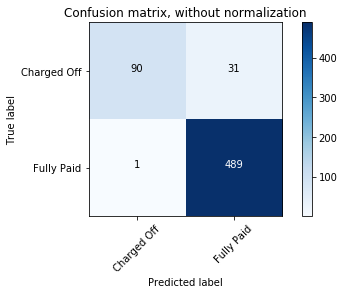

Normalized confusion matrix
[[0.74 0.26]
 [0.   1.  ]]


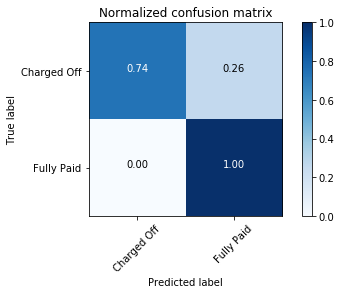

NOTE: During run, true divide errors are acceptable.
    Returned when a tree does not contain any node for either/both upper and lower bounds of a feature.

    
Starting new run at: Tue May 15 15:45:23 2018 with batch_size = 10 and n_batches = 50...(please wait)


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:272: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(uppers, upper_bins)[0]).round(5)
C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:276: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(lowers, lower_bins)[0]).round(5)


done batch 0
done batch 1
done batch 2
done batch 3
done batch 4
done batch 5
done batch 6
done batch 7
done batch 8
done batch 9
done batch 10
done batch 11
done batch 12
done batch 13
done batch 14
done batch 15
done batch 16
done batch 17
done batch 18
done batch 19
done batch 20
done batch 21
done batch 22
done batch 23
done batch 24
done batch 25
done batch 26
done batch 27
done batch 28
done batch 29
done batch 30
done batch 31
done batch 32
done batch 33
done batch 34
done batch 35
done batch 36
done batch 37
done batch 38
done batch 39
done batch 40
done batch 41
done batch 42
done batch 43
done batch 44
done batch 45
done batch 46
done batch 47
done batch 48
done batch 49
Done. Completed run at: Tue May 15 15:59:17 2018. Elapsed time (seconds) = 833.8156656328501

Compiling Training Results at: Tue May 15 15:59:17 2018...(please wait)
Results Completed at: Tue May 15 15:59:19 2018. Elapsed time (seconds) = 2.595782431322732
Whiteboxing Randfor Done

Processing Anchors
Starting

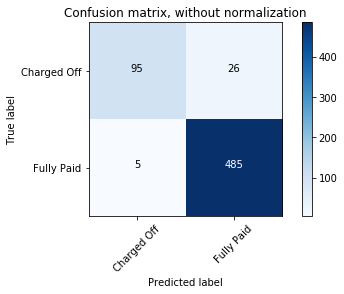

Normalized confusion matrix
[[0.79 0.21]
 [0.01 0.99]]


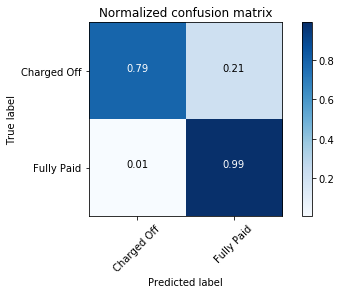

Working on Anchors for instance 489
Working on Anchors for instance 1965


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\routines.py:708: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)


Working on Anchors for instance 381
Working on Anchors for instance 1368
Working on Anchors for instance 1337
Working on Anchors for instance 777
Working on Anchors for instance 701
Working on Anchors for instance 850
Working on Anchors for instance 91
Working on Anchors for instance 1599
Working on Anchors for instance 1181
Working on Anchors for instance 64
Working on Anchors for instance 613


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\routines.py:656: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)


Working on Anchors for instance 1315
Working on Anchors for instance 1873
Working on Anchors for instance 870
Working on Anchors for instance 182
Working on Anchors for instance 1830
Working on Anchors for instance 1109
Working on Anchors for instance 847
Working on Anchors for instance 309
Working on Anchors for instance 1994
Working on Anchors for instance 807
Working on Anchors for instance 882
Working on Anchors for instance 841
Working on Anchors for instance 1727
Working on Anchors for instance 466
Working on Anchors for instance 520
Working on Anchors for instance 970
Working on Anchors for instance 893
Working on Anchors for instance 1547
Working on Anchors for instance 1188
Working on Anchors for instance 1630
Working on Anchors for instance 803
Working on Anchors for instance 1116
Working on Anchors for instance 524
Working on Anchors for instance 1812
Working on Anchors for instance 129
Working on Anchors for instance 1294
Working on Anchors for instance 1022
Working on Anch

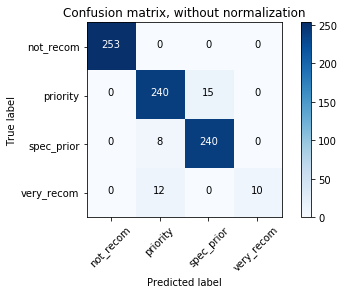

Normalized confusion matrix
[[1.   0.   0.   0.  ]
 [0.   0.94 0.06 0.  ]
 [0.   0.03 0.97 0.  ]
 [0.   0.55 0.   0.45]]


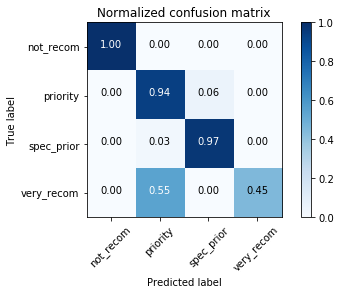

NOTE: During run, true divide errors are acceptable.
    Returned when a tree does not contain any node for either/both upper and lower bounds of a feature.

    
Starting new run at: Tue May 15 16:40:20 2018 with batch_size = 10 and n_batches = 50...(please wait)
done batch 0
done batch 1
done batch 2
done batch 3
done batch 4
done batch 5
done batch 6
done batch 7
done batch 8
done batch 9
done batch 10
done batch 11
done batch 12
done batch 13
done batch 14
done batch 15
done batch 16
done batch 17
done batch 18
done batch 19
done batch 20
done batch 21
done batch 22
done batch 23
done batch 24
done batch 25
done batch 26
done batch 27
done batch 28
done batch 29
done batch 30
done batch 31
done batch 32
done batch 33
done batch 34
done batch 35
done batch 36
done batch 37
done batch 38
done batch 39
done batch 40
done batch 41
done batch 42
done batch 43
done batch 44
done batch 45
done batch 46
done batch 47
done batch 48
done batch 49
Done. Completed run at: Tue May 15 17:48:00 2

C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:789: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)


Results Completed at: Tue May 15 17:48:01 2018. Elapsed time (seconds) = 1.2173277093534125
Whiteboxing Randfor Done

Processing Anchors
Starting new run at: Tue May 15 17:48:01 2018

Best OOB Accuracy Estimate during tuning: 0.9625
Best parameters: {'max_depth': 16, 'min_samples_leaf': 1, 'n_estimators': 500}

Training a random forest model using best parameters... (please wait)


C:\Users\id126493\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)



Done

Created helper function enc_model(). A pipeline: feature encoding -> rf model

Accuracy on unseen instances: 0.9550
Cohen's Kappa on unseen instances: 0.9338

Precision: [1.0, 0.92, 0.94, 1.0]
Recall: [1.0, 0.94, 0.97, 0.45]
F1 Score: [1.0, 0.93, 0.95, 0.62]
Support: [253, 255, 248, 22]

Confusion matrix, without normalization
[[253   0   0   0]
 [  0 240  15   0]
 [  0   8 240   0]
 [  0  12   0  10]]


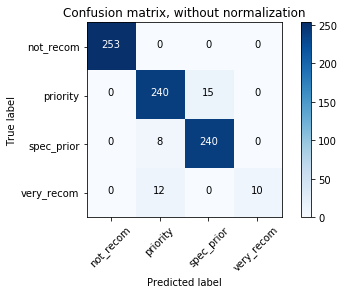

Normalized confusion matrix
[[1.   0.   0.   0.  ]
 [0.   0.94 0.06 0.  ]
 [0.   0.03 0.97 0.  ]
 [0.   0.55 0.   0.45]]


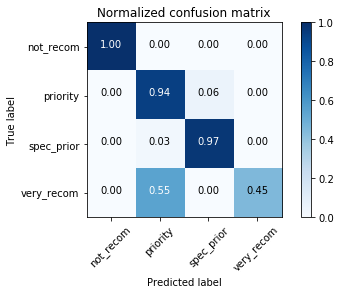

Working on Anchors for instance 33
Working on Anchors for instance 2300
Working on Anchors for instance 379
Working on Anchors for instance 2347
Working on Anchors for instance 403
Working on Anchors for instance 440


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\routines.py:656: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)


Working on Anchors for instance 1501
Working on Anchors for instance 1951


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\routines.py:708: RuntimeWarning: invalid value encountered in true_divide
  plaus /= np.sum(plaus)


Working on Anchors for instance 2325
Working on Anchors for instance 813
Working on Anchors for instance 673
Working on Anchors for instance 2424
Working on Anchors for instance 1000
Working on Anchors for instance 746
Working on Anchors for instance 252
Working on Anchors for instance 2330
Working on Anchors for instance 1628
Working on Anchors for instance 132
Working on Anchors for instance 2110
Working on Anchors for instance 2526
Working on Anchors for instance 649
Working on Anchors for instance 1185
Working on Anchors for instance 2362
Working on Anchors for instance 2358
Working on Anchors for instance 2349
Working on Anchors for instance 1791
Working on Anchors for instance 1533
Working on Anchors for instance 1801
Working on Anchors for instance 1729
Working on Anchors for instance 1338
Working on Anchors for instance 116
Working on Anchors for instance 270
Working on Anchors for instance 1113
Working on Anchors for instance 2568
Working on Anchors for instance 1481
Working o

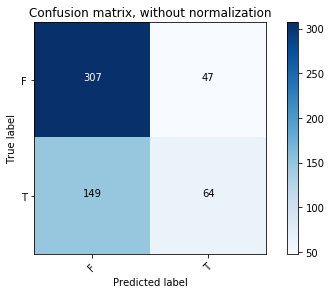

Normalized confusion matrix
[[0.87 0.13]
 [0.7  0.3 ]]


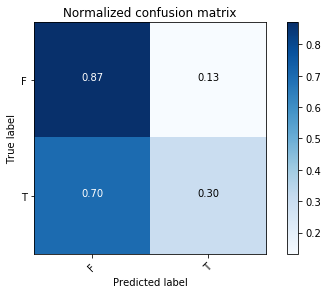

NOTE: During run, true divide errors are acceptable.
    Returned when a tree does not contain any node for either/both upper and lower bounds of a feature.

    
Starting new run at: Tue May 15 17:57:32 2018 with batch_size = 10 and n_batches = 50...(please wait)


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:272: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(uppers, upper_bins)[0]).round(5)
C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:276: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(lowers, lower_bins)[0]).round(5)


done batch 0
done batch 1
done batch 2
done batch 3
done batch 4
done batch 5
done batch 6
done batch 7
done batch 8
done batch 9
done batch 10
done batch 11
done batch 12
done batch 13
done batch 14
done batch 15
done batch 16


In [ ]:
n_instances=500
n_batches=50
eval_model=True

for eg in exp_grid1.index:
    print(exp_grid1.loc[eg])
    grid_experiment(dsets=datasets,
                        n_instances=n_instances,
                        n_batches=n_batches,
                        random_state=exp_grid1.loc[eg]['random_state'],
                        override_tuning=exp_grid1.loc[eg]['override_tuning'],
                        support_paths=exp_grid1.loc[eg]['support_paths'],
                        alpha_paths=exp_grid1.loc[eg]['alpha_paths'],
                        precis_threshold=exp_grid1.loc[eg]['precis_threshold'],
                        run_anchors=True)

random_state         123
alpha_paths          0.1
support_paths       0.01
precis_threshold    0.95
override_tuning     True
Name: 0, dtype: object
LOADING NEW DATA SET.

Finding best parameters for Random Forest. Checking for prior tuning parameters.

Using existing params file. To re-tune, delete file at whiteboxing\adult_small_samp_pickles\params.json

Best OOB Accuracy Estimate during tuning: 0.8443
Best parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 500}

Training a random forest model using best parameters... (please wait)

Done

Created helper function enc_model(). A pipeline: feature encoding -> rf model

Accuracy on unseen instances: 0.8501
Cohen's Kappa on unseen instances: 0.5002

Precision: [0.87, 0.75]
Recall: [0.95, 0.48]
F1 Score: [0.91, 0.59]
Support: [286, 81]

Confusion matrix, without normalization
[[273  13]
 [ 42  39]]


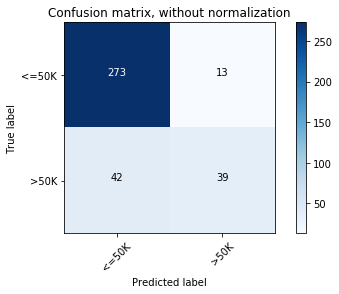

Normalized confusion matrix
[[0.95 0.05]
 [0.52 0.48]]


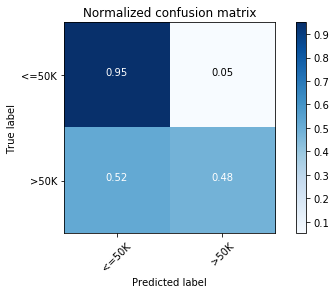

NOTE: During run, true divide errors are acceptable.
    Returned when a tree does not contain any node for either/both upper and lower bounds of a feature.

    
Starting new run at: Mon May 14 10:23:48 2018 with batch_size = 7 and n_batches = 50...(please wait)


C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:276: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(lowers, lower_bins)[0]).round(5)
C:\Users\id126493\Documents\GitHub\interpret_basics2\forest_surveyor\structures.py:272: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(uppers, upper_bins)[0]).round(5)


done batch 0
done batch 1
done batch 2
done batch 3
done batch 4
done batch 5
done batch 6
done batch 7
done batch 8
done batch 9
done batch 10


KeyboardInterrupt: 

In [4]:
n_instances=500
n_batches=50
eval_model=True

for eg in exp_grid1.index:
    print(exp_grid1.loc[eg])
    grid_experiment(datasets=datasets,
                    n_instances=n_instances,
                    n_batches=n_batches,
                    random_state=exp_grid1.loc[eg]['random_state'],
                    override_tuning=False, # exp_grid1.loc[eg]['override_tuning'],
                    support_paths=0.2, # exp_grid1.loc[eg]['support_paths'],
                    alpha_paths=0.1, # exp_grid1.loc[eg]['alpha_paths'],
                    precis_threshold=exp_grid1.loc[eg]['precis_threshold'],
                    run_anchors=False)

In [6]:


# random_state = np.repeat([123, 124, 125, 126, 127], 20)
# alpha_paths = np.tile(np.repeat([0.1, 0.3, 0.5, 0.7, 0.9], 4) ,5)
# support_paths = np.tile([0.01, 0.02, 0.1, 0.2], 25) 
# over_f = np.repeat([False], 19)
# over_t = np.concatenate((np.array([True]), over_f))
# override_tuning = np.tile(over_t, 5)
# precis_threshold = np.tile([0.95], 100) # this will be updated
# exp_grid1 = DataFrame([(r, a, s, p, o) for r, a, s, p, o in zip(random_state,
#                                                                 alpha_paths,
#                                                                 support_paths,
#                                                                 precis_threshold,
#                                                                 override_tuning) if r == 123], # remove this
#                      columns=['random_state', 'alpha_paths', 'support_paths', 'precis_threshold', 'override_tuning'])
